In [4]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download stopwords if you haven't
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df = pd.read_csv('../datas/raw_analyst_ratings.csv')
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

# Apply cleaning
df['clean_headline'] = df['headline'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tfidf = TfidfVectorizer(max_features=20, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df['clean_headline'])

# Top keywords
print("🔑 Top Keywords or Phrases:")
print(tfidf.get_feature_names_out())


🔑 Top Keywords or Phrases:
['announces' 'benzingas' 'buy' 'downgrades' 'earnings' 'eps' 'est'
 'market' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'top'
 'trading' 'update' 'upgrades' 'vs']


In [6]:
from sklearn.decomposition import LatentDirichletAllocation

# Use CountVectorizer for LDA
count_vect = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['clean_headline'])

# Train an LDA model with 5 topics (you can adjust this number)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\n🧵 Topic #{idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, count_vect.get_feature_names_out(), 10)



🧵 Topic #1:
benzingas, earnings, scheduled, upgrades, downgrades, market, biggest, etf, morning, 2019

🧵 Topic #2:
update, shares, market, says, earnings, stock, markets, new, higher, announces

🧵 Topic #3:
pt, buy, shares, target, price, maintains, raises, trading, downgrades, announces

🧵 Topic #4:
vs, est, eps, reports, sales, 52week, stocks, q4, q1, estimate

🧵 Topic #5:
stocks, session, moving, watch, premarket, etfs, industry, dividend, midday, highest


C:\Users\Bob\AppData\Local\Temp\ipykernel_20500\1010120540.py:13: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


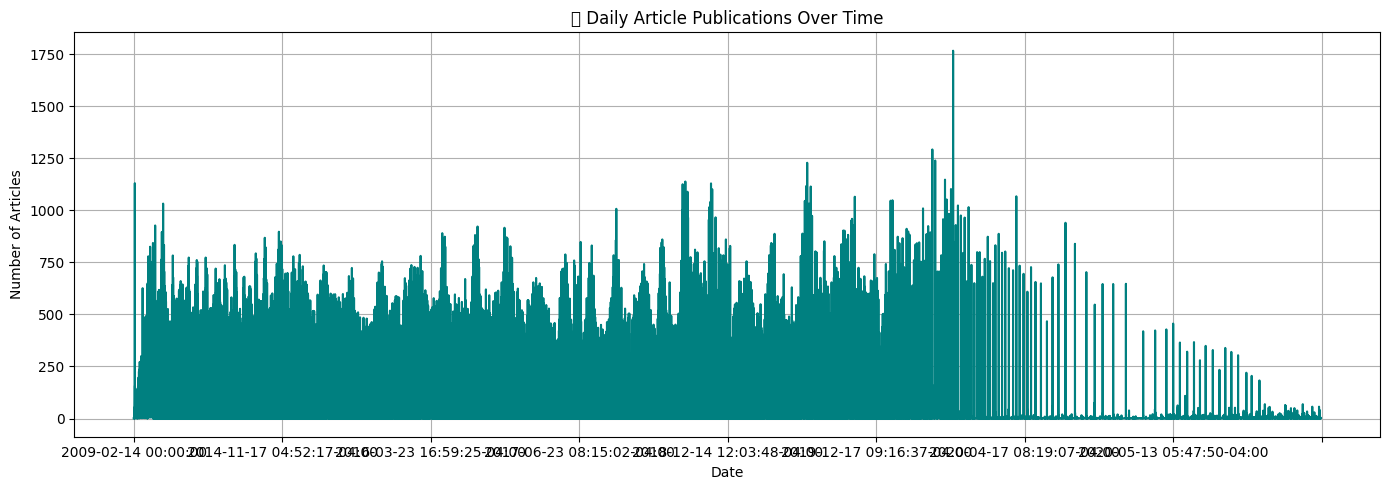

In [7]:
# Count how many articles were published each day
daily_counts = df['date'].value_counts().sort_index()

# Plotting daily publication frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
daily_counts.plot(kind='line', color='teal')
plt.title('🗓️ Daily Article Publications Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Bob\AppData\Local\Temp\ipykernel_20500\4044275124.py:22: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


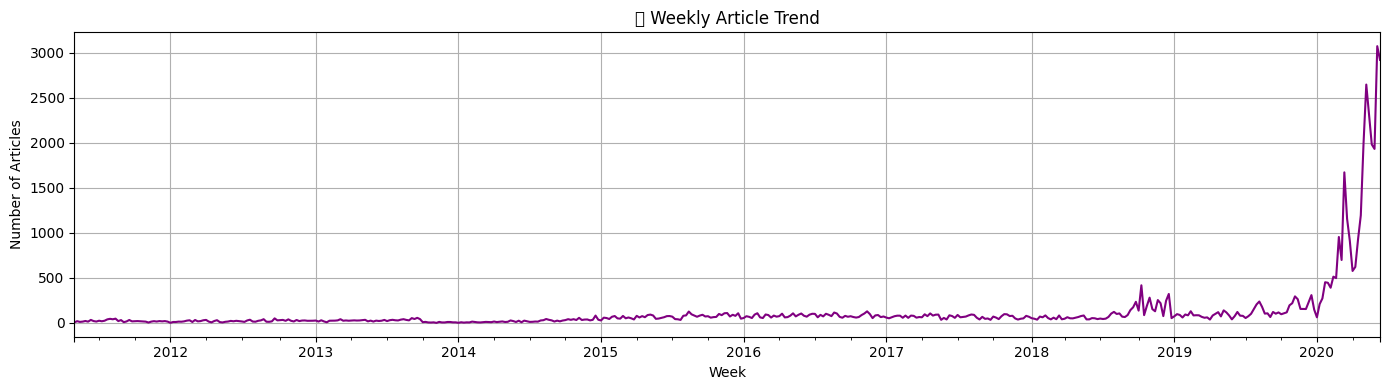

In [11]:
# First, make sure 'date' is converted correctly
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # coerce converts invalid dates to NaT

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Now safely set index
df.set_index('date', inplace=True)

# Then resample and count headlines per week
weekly_counts = df['headline'].resample('W').count()

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
weekly_counts.plot(color='purple')
plt.title('📆 Weekly Article Trend')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display top 10 publishers
print("🔝 Top 10 Publishers by Number of Articles:")
print(publisher_counts.head(10))


🔝 Top 10 Publishers by Number of Articles:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


C:\Users\Bob\AppData\Local\Temp\ipykernel_20500\2309241554.py:9: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


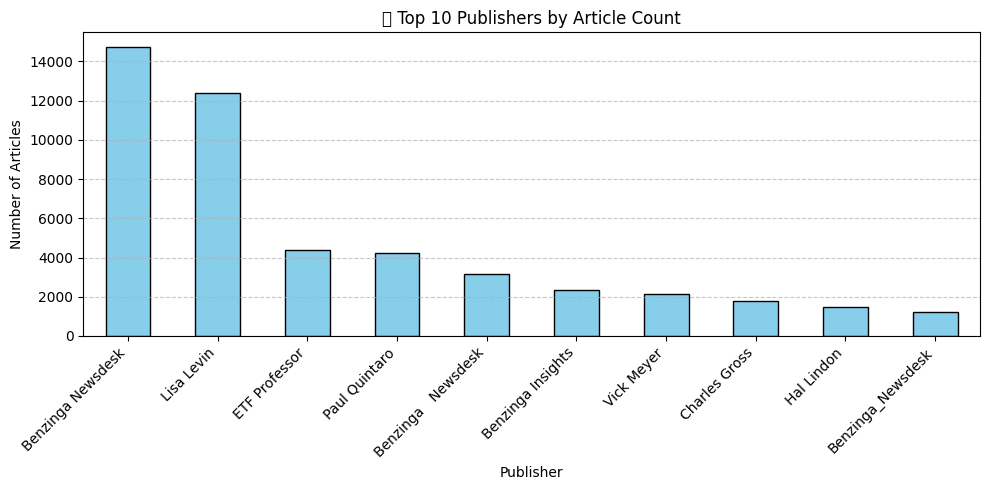

In [15]:
# Bar chart of top 10 publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('🏢 Top 10 Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xlabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
import re

# Function to extract domain from email
def extract_domain(publisher):
    match = re.search(r'@([A-Za-z0-9.-]+\.[A-Za-z]{2,})', str(publisher))
    return match.group(1) if match else None

# Apply domain extraction
df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count top domains
domain_counts = df['publisher_domain'].value_counts()

# Display top contributing domains
print("📧 Top Domains by Frequency:")
print(domain_counts.head(10))


📧 Top Domains by Frequency:
publisher_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


In [21]:
# Average sentiment per publisher
df = pd.read_csv('../datas/sentimenta_added_data.csv')

publisher_sentiment = df.groupby('publisher')['Sentiment'].mean().sort_values(ascending=False)

# Print or plot
print("😊 Average Sentiment per Publisher (Top 10):")
print(publisher_sentiment.head(10))


😊 Average Sentiment per Publisher (Top 10):
publisher
Brett Phillips            1.00
Eric Martin               1.00
Frank Ochoa               0.80
giovannimola              0.80
Ben Reynolds              0.80
The Professor             0.80
White Diamond Research    0.65
Happy Trading             0.65
Michael Prus              0.60
Robert Morris             0.60
Name: Sentiment, dtype: float64


😊 Average Sentiment per Publisher (Top 10):
publisher
Brett Phillips            1.00
Eric Martin               1.00
Frank Ochoa               0.80
giovannimola              0.80
Ben Reynolds              0.80
The Professor             0.80
White Diamond Research    0.65
Happy Trading             0.65
Michael Prus              0.60
Robert Morris             0.60
Name: Sentiment, dtype: float64


C:\Users\Bob\AppData\Local\Temp\ipykernel_20500\2128709992.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


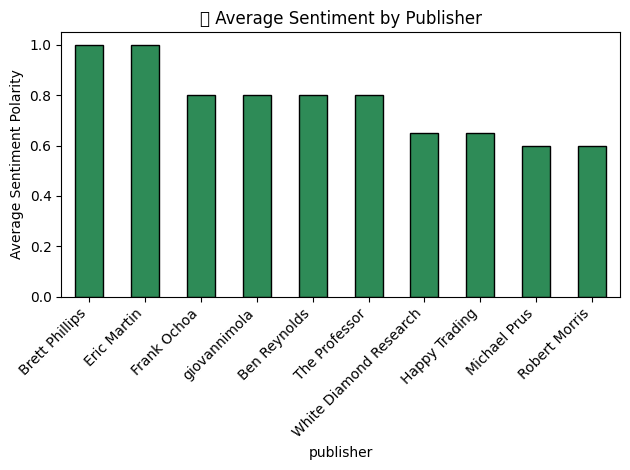

In [22]:
# Group by publisher and calculate average sentiment
publisher_sentiment = df.groupby('publisher')['Sentiment'].mean().sort_values(ascending=False)

# View top 10 publishers with most positive sentiment
print("😊 Average Sentiment per Publisher (Top 10):")
print(publisher_sentiment.head(10))

# Optional: Plot it
publisher_sentiment.head(10).plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('📊 Average Sentiment by Publisher')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
